In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt


C:\Users\88015\Anaconda3\envs\thesis\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
pocha_data = load_boston()

In [4]:
pocha_data

{'data': array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
           1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
        [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
           1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
        [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
           1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
        ..., 
        [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
           2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
        [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
           2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
        [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
           2.10000000e+01,   3.96900000e+02,   7.88000000e+00]]),
 'target': array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
         18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
         20.2,  18.2,  13.6,  19

In [5]:
valo_data = pd.DataFrame(pocha_data.data, columns = pocha_data.feature_names)
valo_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [6]:
target = pd.DataFrame(pocha_data.target)

In [7]:
valo_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
model_1 = linear_model.LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(valo_data, target, test_size = 0.25, random_state = 4)

In [9]:
model_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
dam_nirnoy = model_1.predict(x_test)

In [11]:
print(dam_nirnoy[0])
print(y_test[0])

[ 11.87189743]
8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
70     24.2
55     35.4
470    19.9
409    27.5
154    17.0
344    31.2
272    24.4
310    16.1
160    27.0
319    21.0
454    14.9
11     18.9
399     6.3
413    16.3
25     13.9
418     8.8
153    19.4
124    18.8
108    19.8
345    17.5
103    19.3
209    20.0
129    14.3
432    16.1
106    19.5
       ... 
368    50.0
144    11.8
336    19.5
437     8.7
216    23.3
192    36.4
138    13.3
251    24.8
13     20.4
256    44.0
299    29.0
180    39.8
92     22.9
219    23.0
152    15.3
214    23.7
191    30.5
276    33.2
184    26.4
163    50.0
421    14.2
490     8.1
61     16.0
76     20.0
397     8.5
238    23.7
302    26.4
323    18.5
459    20.0
166    50.0
Name: 0, Length: 127, dtype: float64


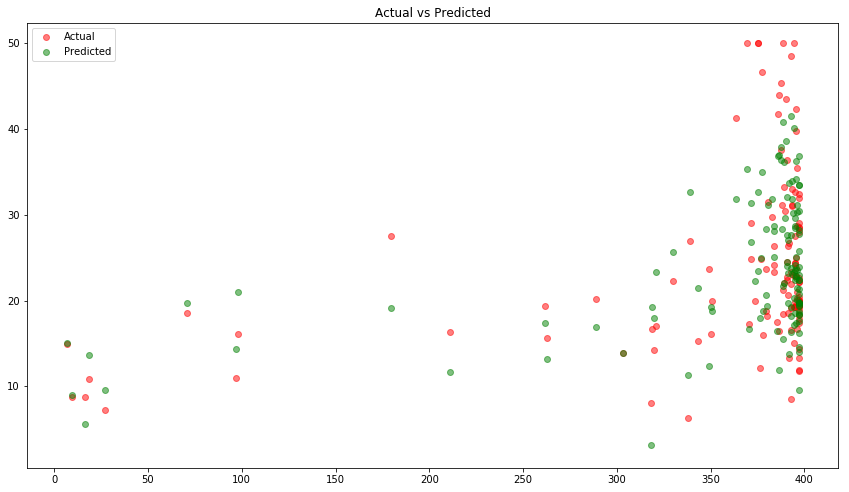

In [15]:
fig = plt.figure(figsize = (32,18))
plt.subplot2grid ((2,2),(0,0))
plt.scatter(x_test['B'],y_test[0], alpha = 0.5, color='red', label= 'Actual')


plt.scatter(x_test['B'],dam_nirnoy, alpha = 0.5, color = 'green', label ='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
fig.savefig('fig')
#plt.show()

In [23]:
x_test['B']


8      386.63
289    371.72
68     396.90
211    395.24
226    387.38
70     383.73
55     395.93
470    396.90
409    179.36
154    321.02
344    387.97
272    394.96
310    350.45
160    338.92
319    396.23
454      6.68
11     396.90
399    338.16
413    210.97
25     303.42
418     16.45
153    261.95
124    379.38
108    395.24
345    385.64
103    394.47
209    396.90
129    396.90
432     97.95
106    395.67
        ...  
368    375.52
144    396.90
336    396.90
437      9.32
216    392.80
192    390.49
138    392.04
251    377.07
13     396.90
256    386.34
299    371.58
180    395.56
92     395.01
219    393.74
152    343.28
214    348.93
191    389.71
276    389.25
184    391.00
163    388.45
421    319.98
490    318.43
61     378.08
76     373.66
397    393.10
238    379.41
302    383.61
323    391.13
459    396.90
166    369.30
Name: B, Length: 127, dtype: float64